In [6]:
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tqdm

%matplotlib inline

In [1]:
PATTERN = "ne-6000000_np-5000000_dt-2.0_nb-25_fc-1.0_h1_middle-rep1"

In [7]:
all_csvs = sorted(
    pathlib.Path(".").glob(f"runs-interchange-final/*/{PATTERN}/equilibration.csv")
)

In [5]:
def plot_csv(csv: str):
    df = pd.read_csv(csv)
    cols = [x for x in df.columns if (x != '#"Step"' and "Speed" not in x)]
    melted = df.melt(
        id_vars=["Time (ps)"],
        value_vars=cols,
        var_name="Quantity",
        value_name="Value"
    )
    g = sns.FacetGrid(melted, col="Quantity", col_wrap=3, sharey=False, sharex=False)
    g.map(sns.lineplot, "Time (ps)", "Value")
    g.set_titles("{col_name}")

    pattern = csv.parent.stem
    entry_name = csv.parent.parent.stem
    output_name = f"images/{pattern}/equilibration/{entry_name}.png"
    pathlib.Path(output_name).parent.mkdir(exist_ok=True, parents=True)

    plt.tight_layout()
    g.savefig(output_name, dpi=300)

In [15]:
# interesting_ids = [
#     312, 125, 1138, 1406, 1312, 82, 1366, 831, 127, 1110, 1195, 1060, 982, 113, 732, 594, 126, 383, 1083, 123, 668, 704, 114, 129, 1410, 297, 534, 35, 818, 587, 280, 576, 1131, 464, 1004, 1305, 795, 1023, 1257, 60, 1002, 401, 100, 1005
# ]
interesting_ids = [
    312, 383, 297, 280, 464, 401, 318, 436
]
interesting_entries = [
    f"entry-{x:04d}" for x in interesting_ids
]
interesting_paths = [
    x for x in all_csvs
    if x.parent.parent.stem in interesting_entries
]
len(interesting_paths)

44

 45%|███████████████████▌                       | 20/44 [00:18<00:20,  1.16it/s]/Users/lily/micromamba/envs/openff-nagl-test/lib/python3.10/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
100%|███████████████████████████████████████████| 44/44 [00:40<00:00,  1.10it/s]


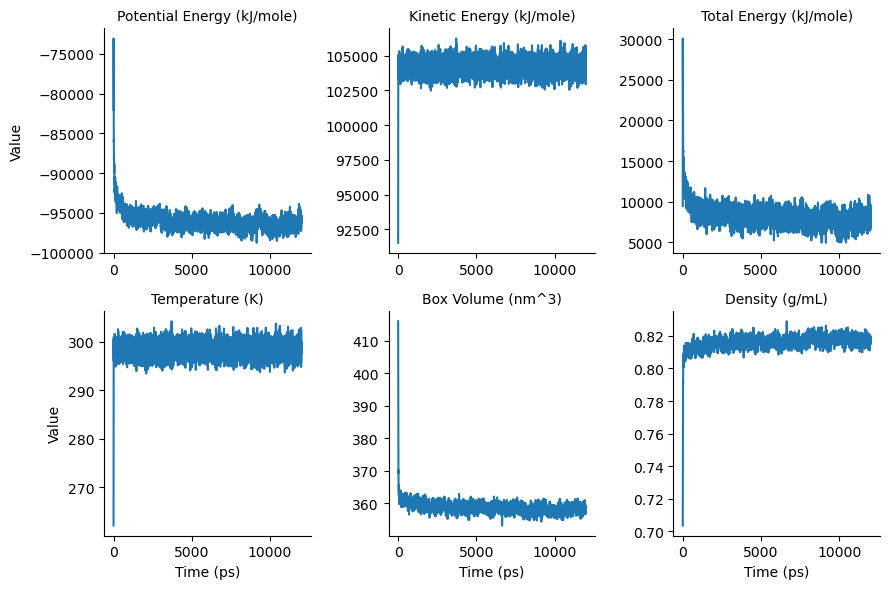

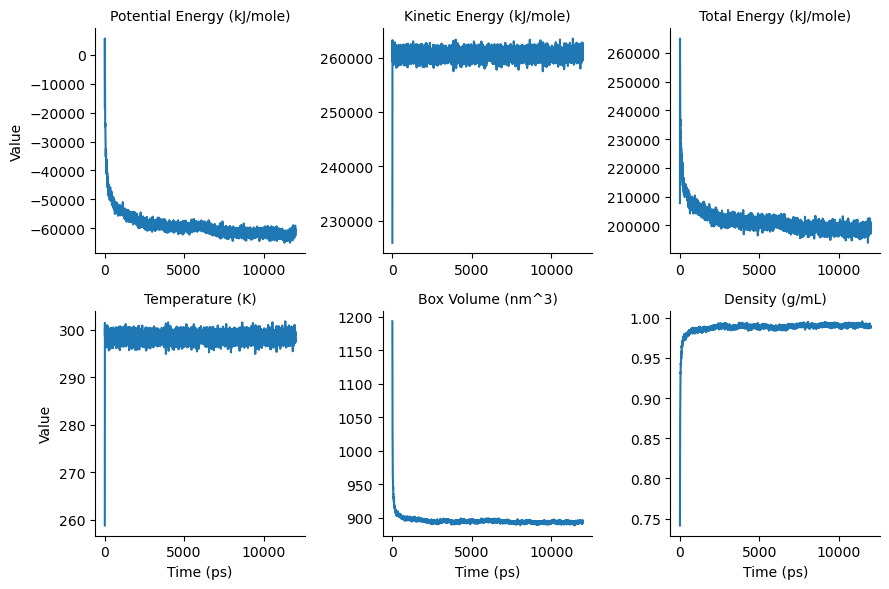

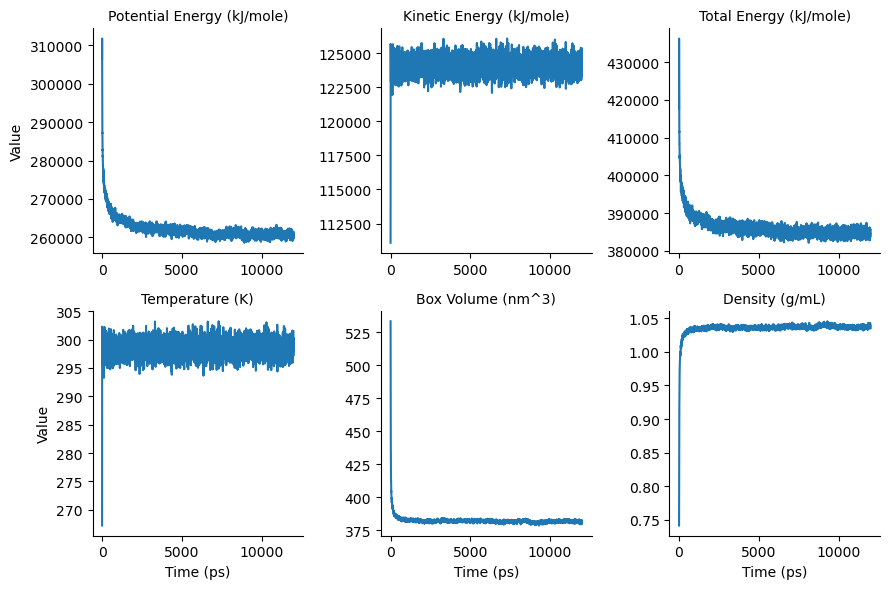

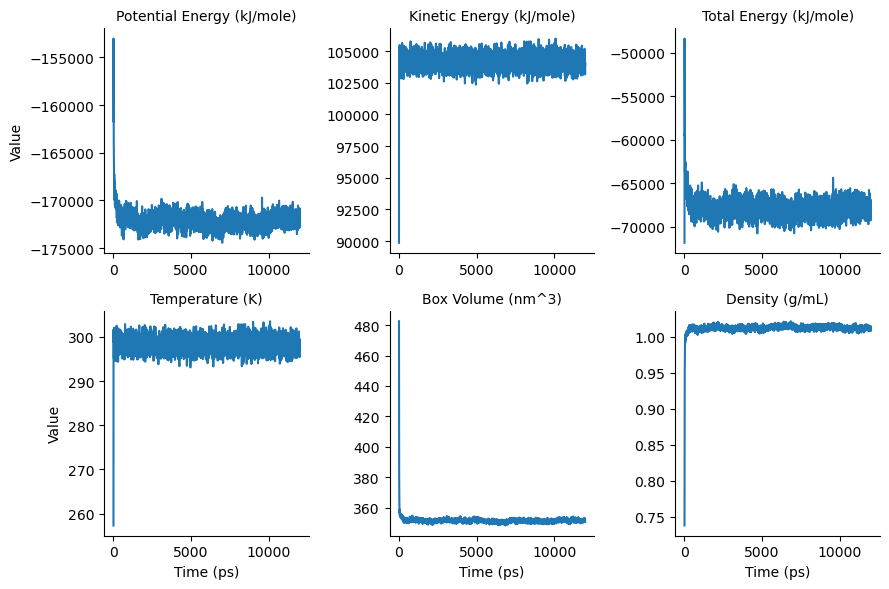

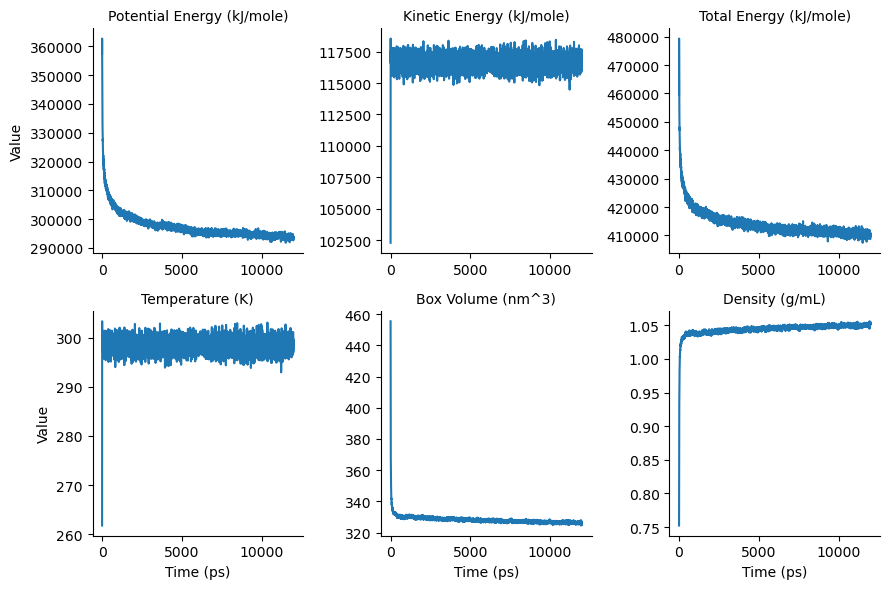

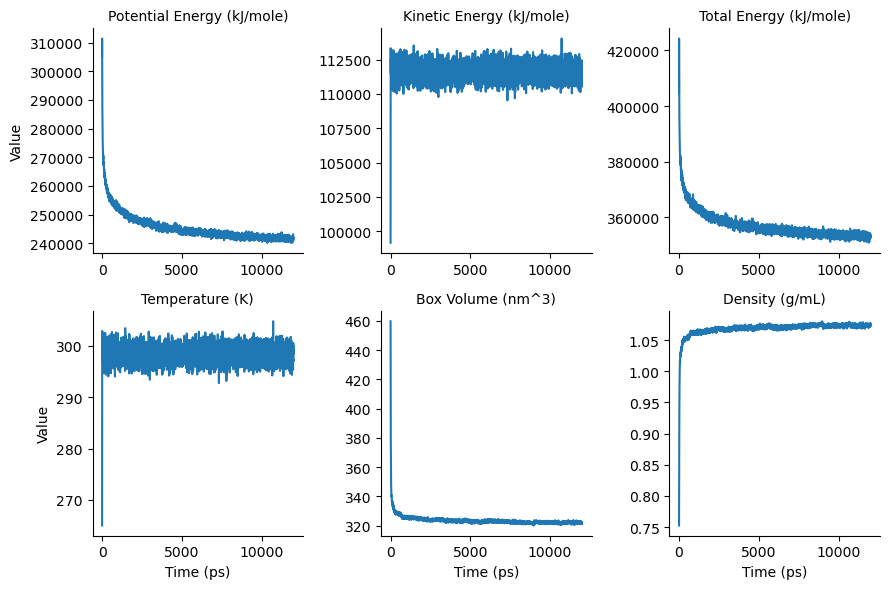

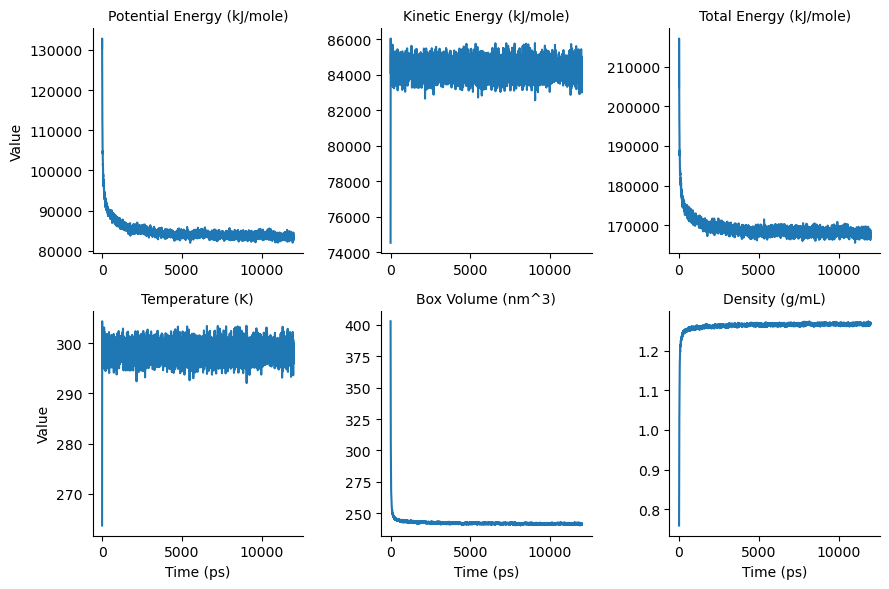

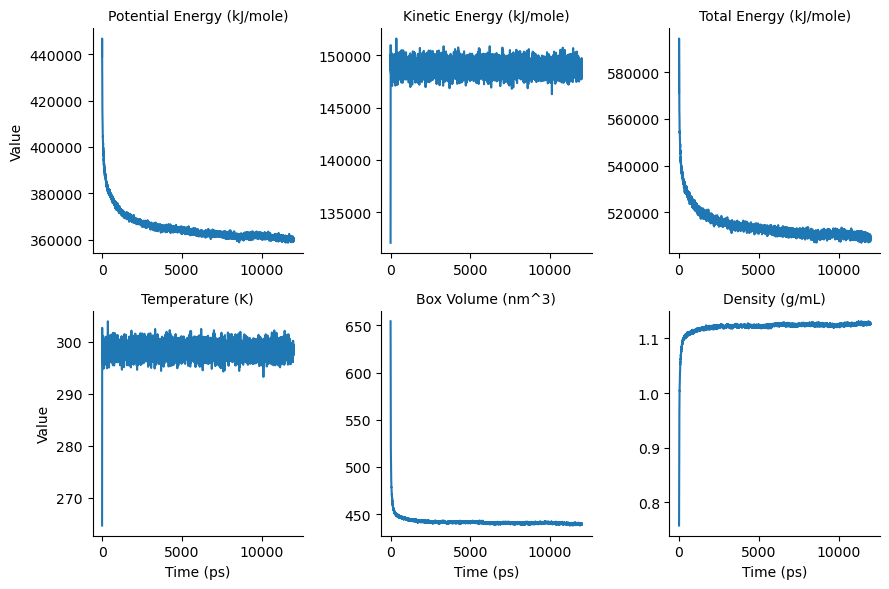

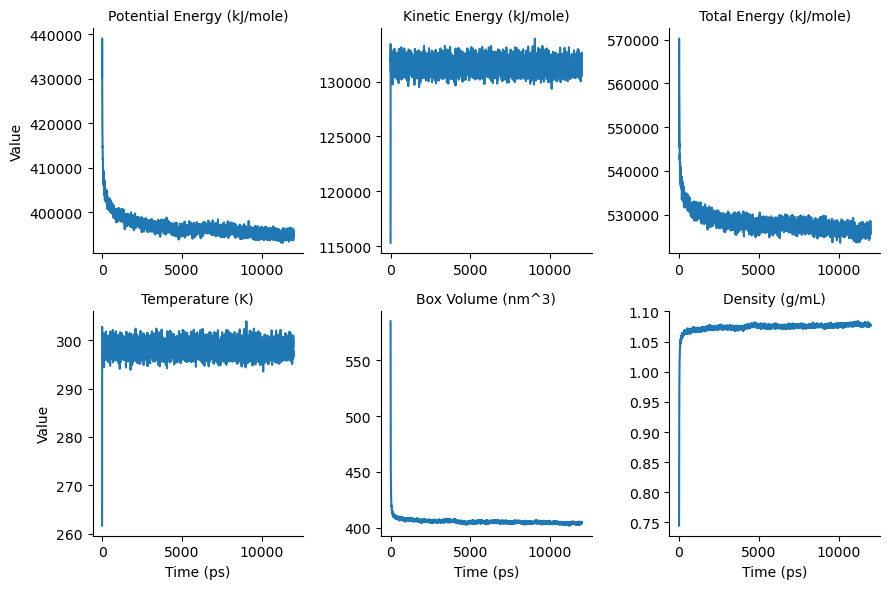

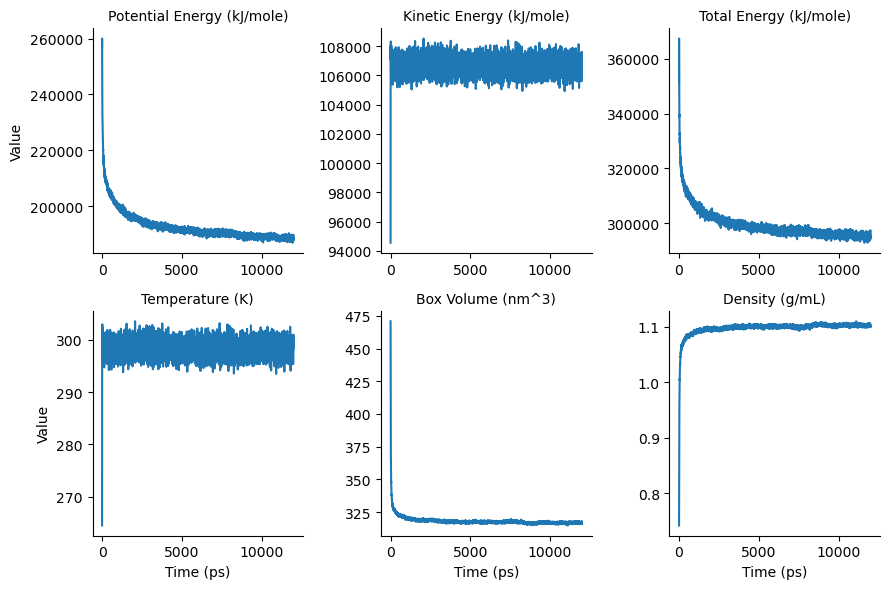

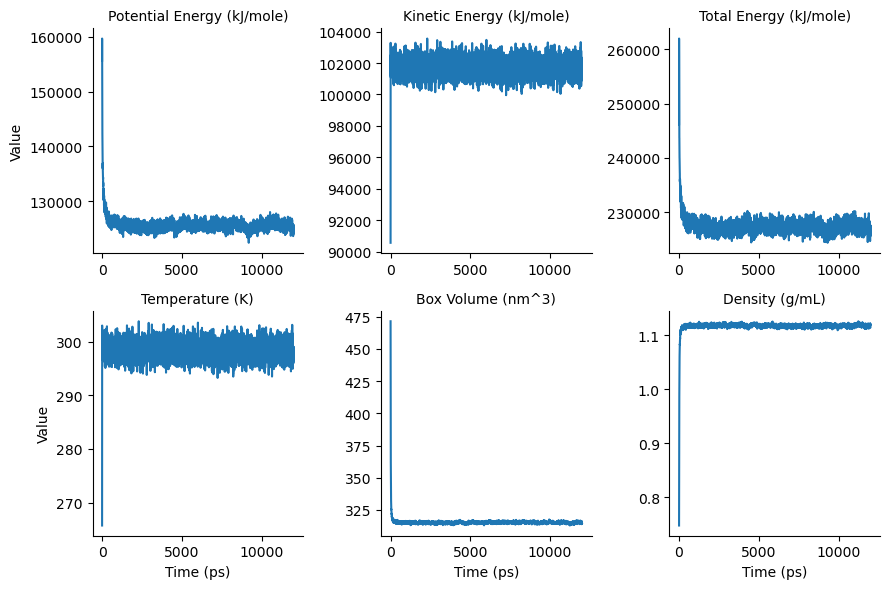

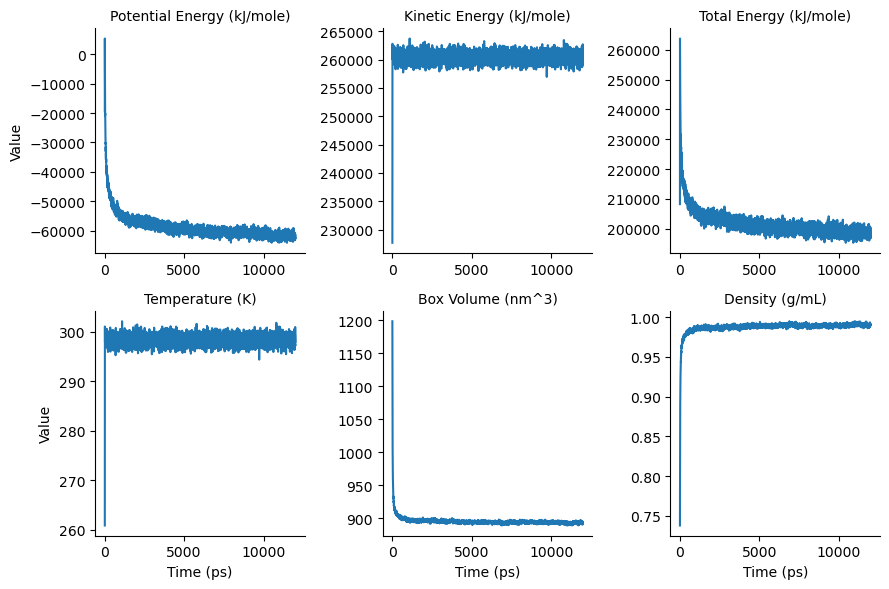

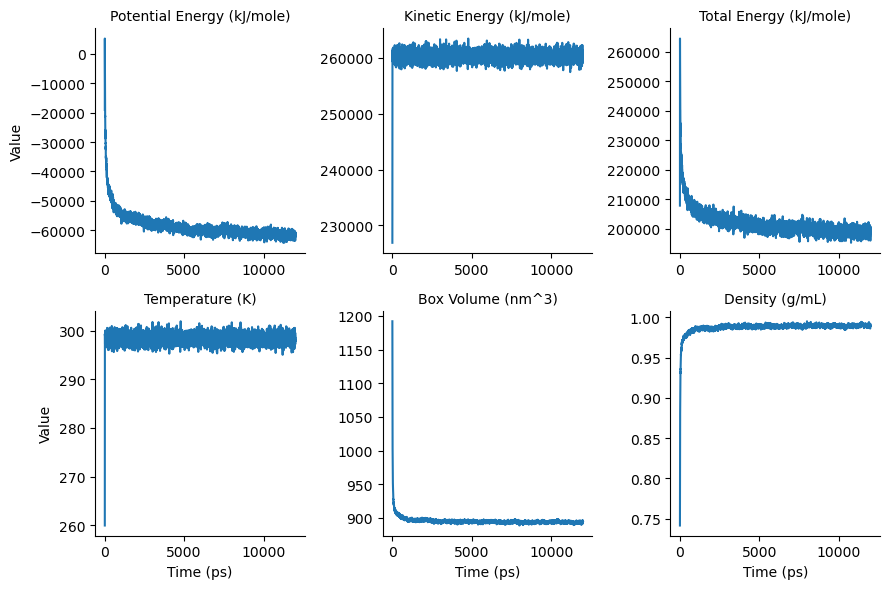

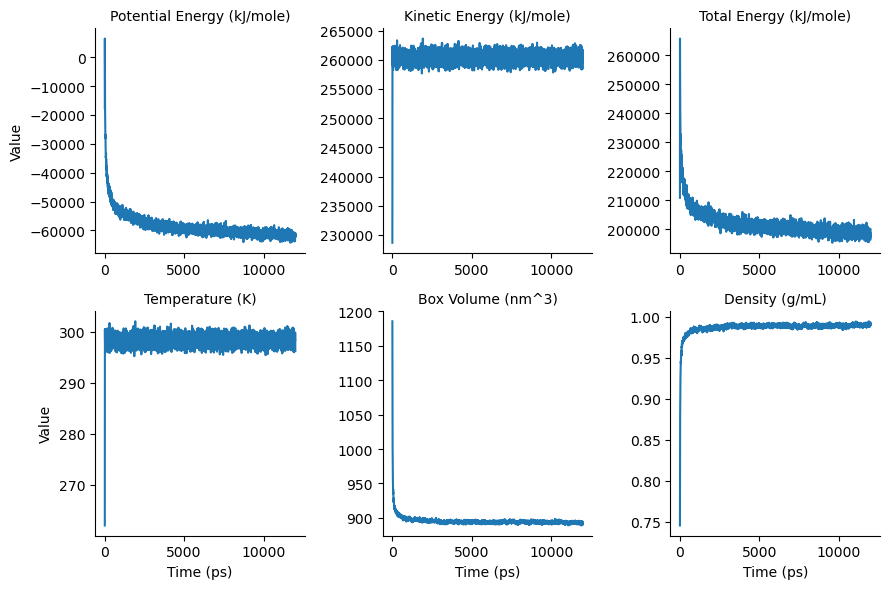

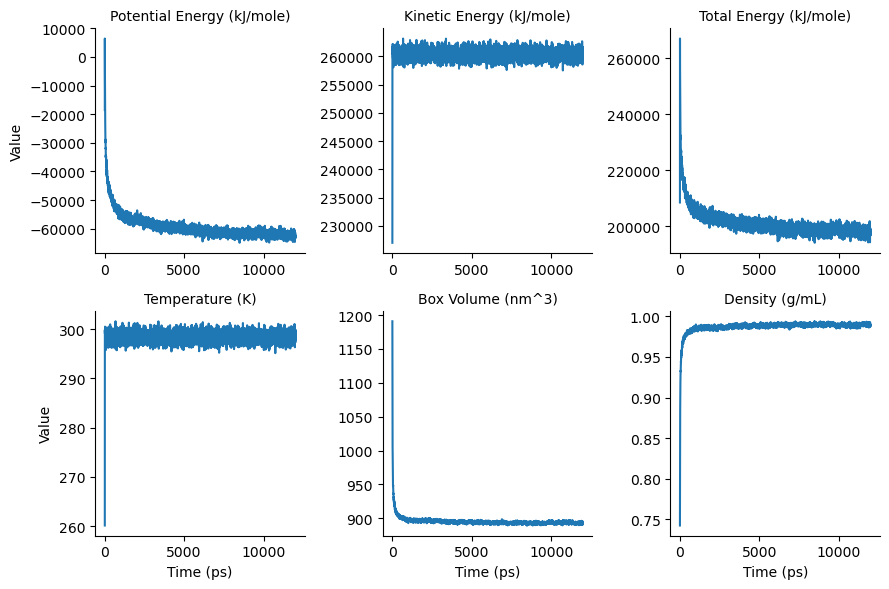

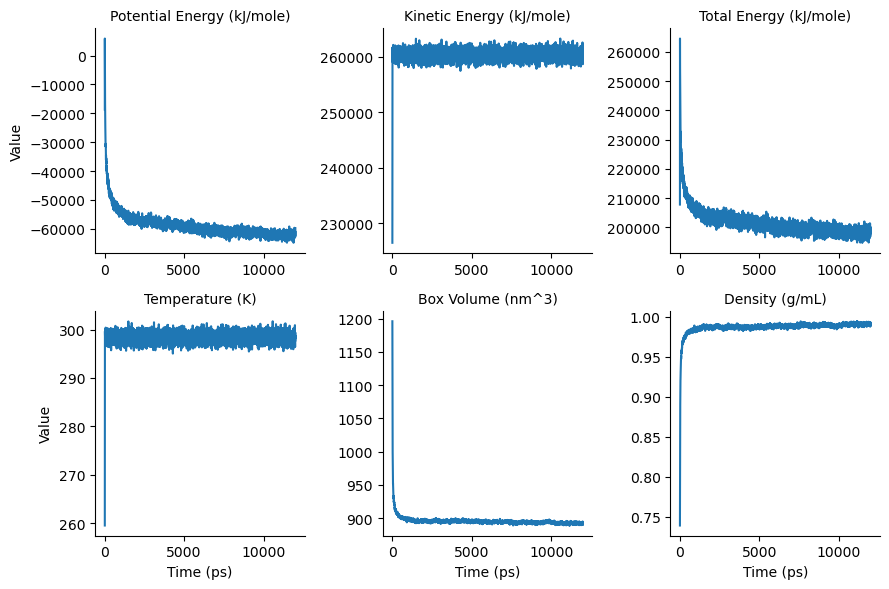

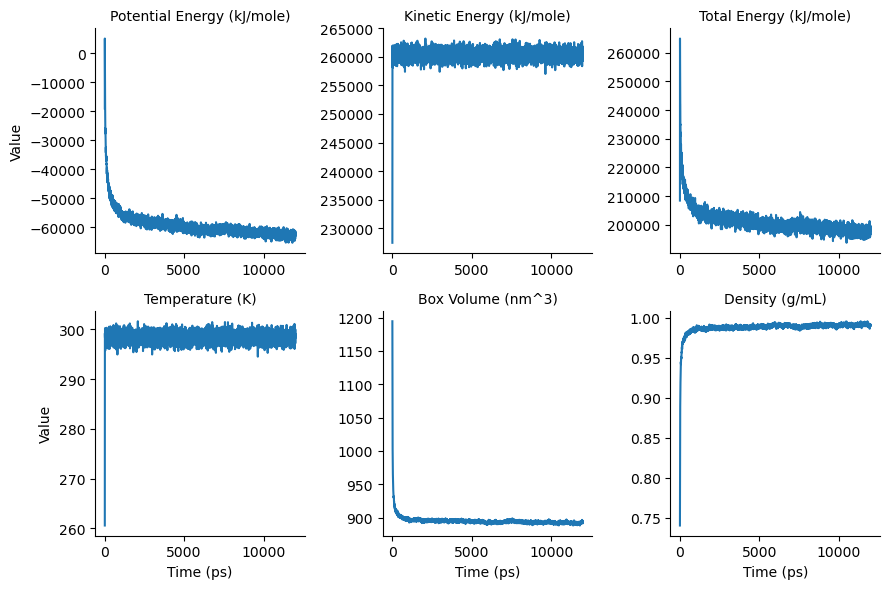

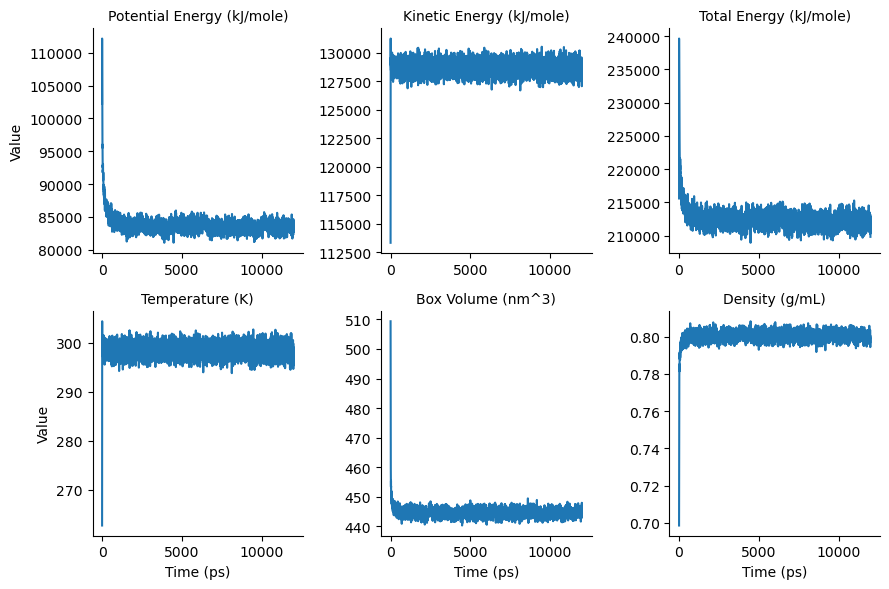

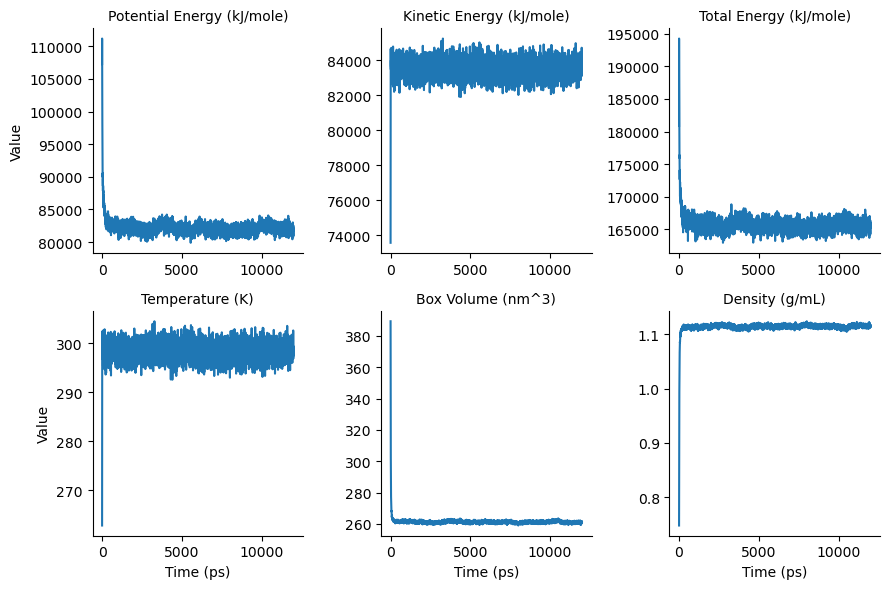

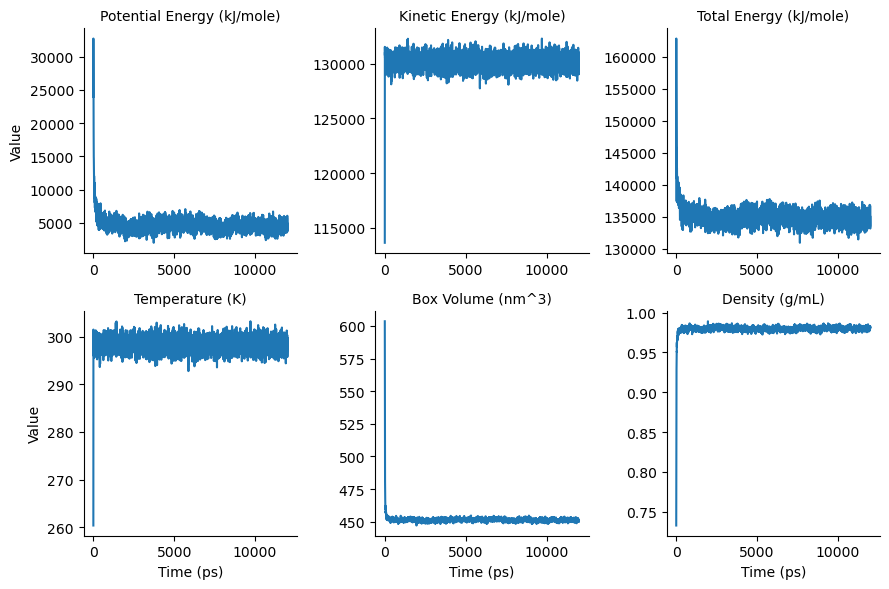

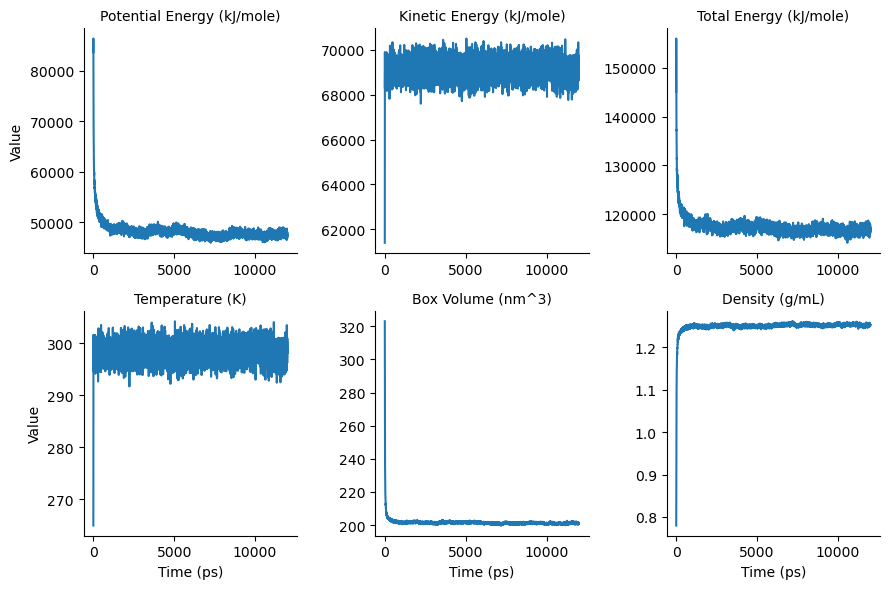

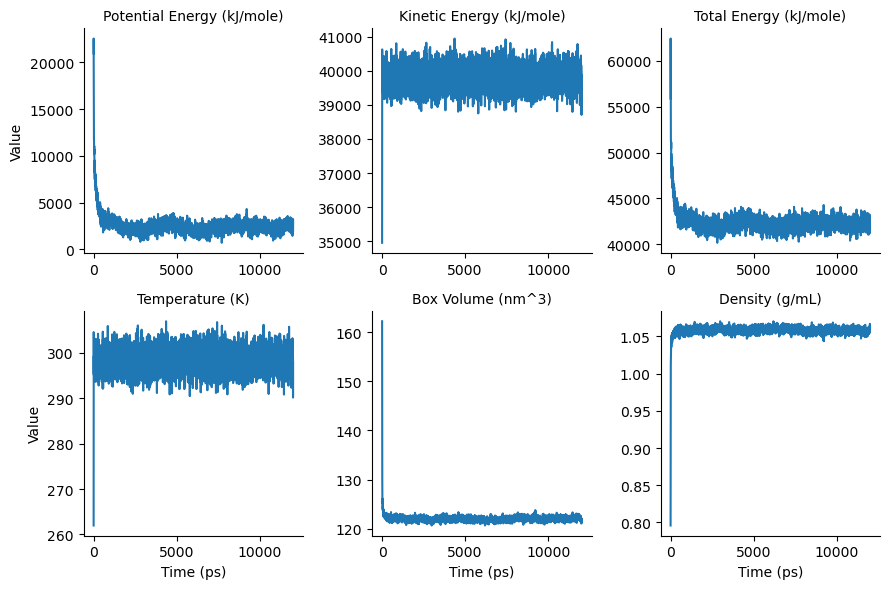

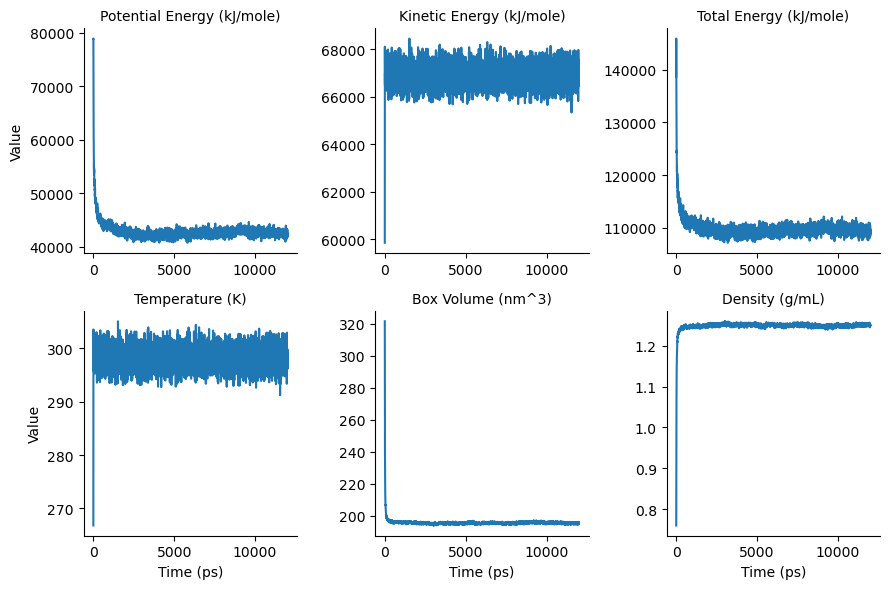

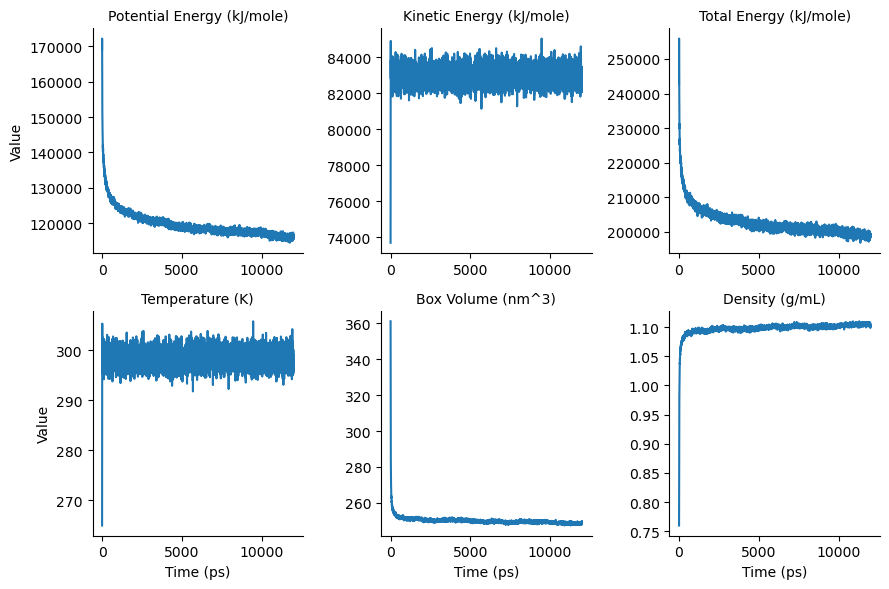

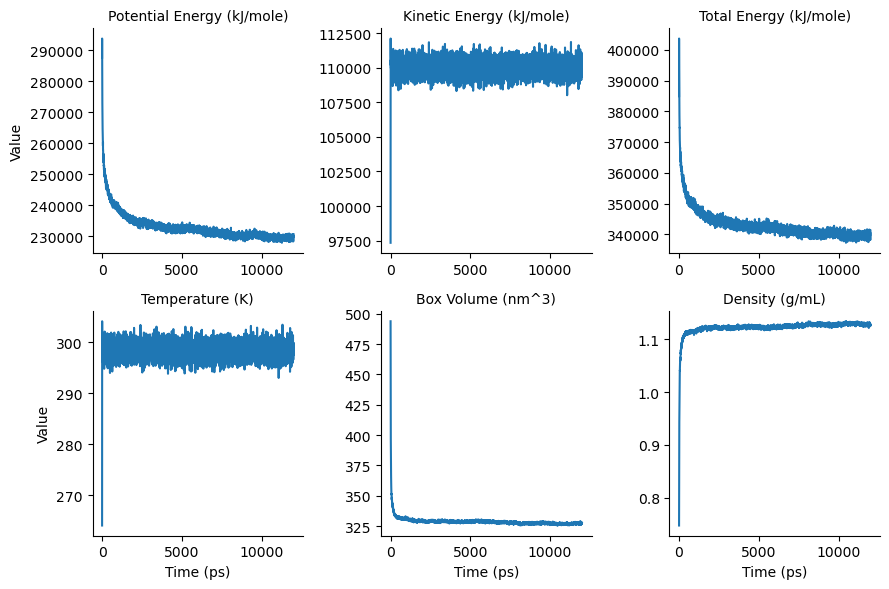

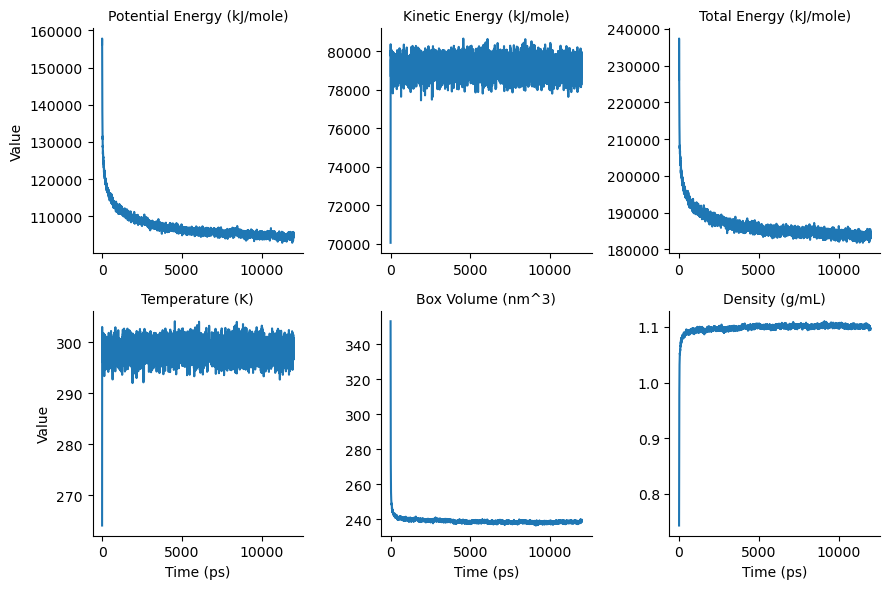

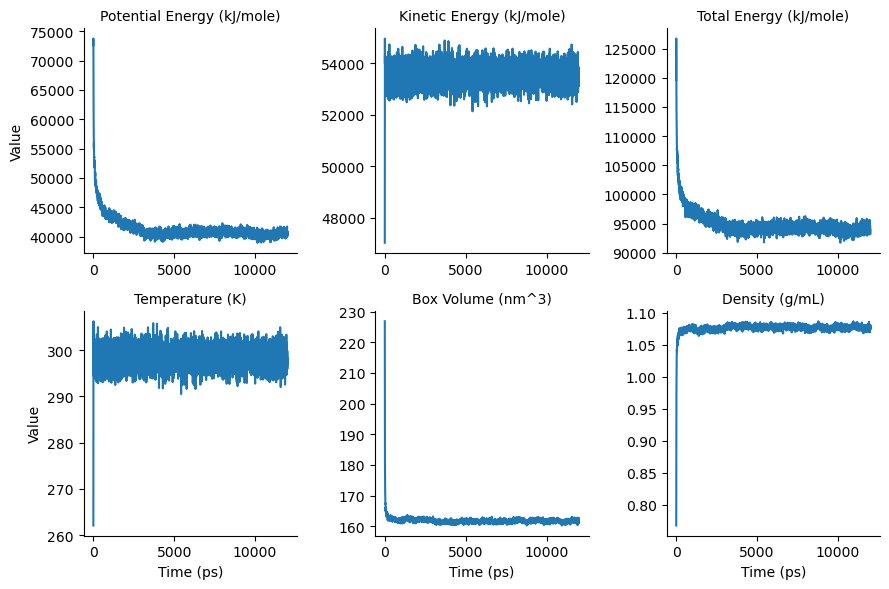

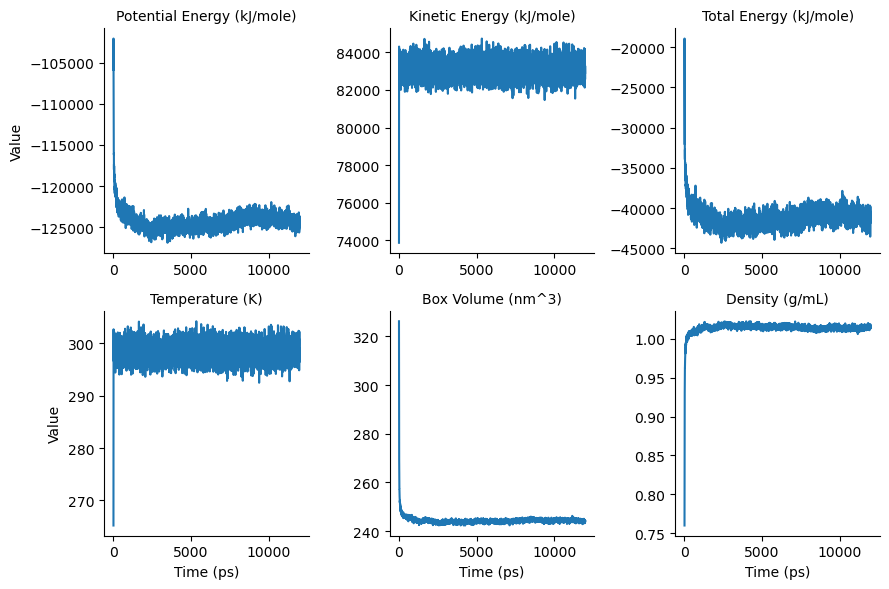

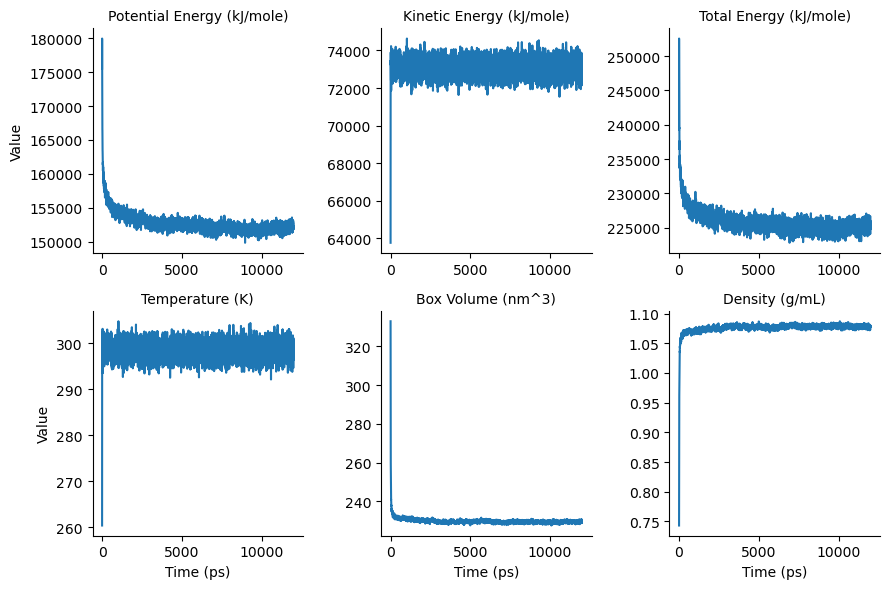

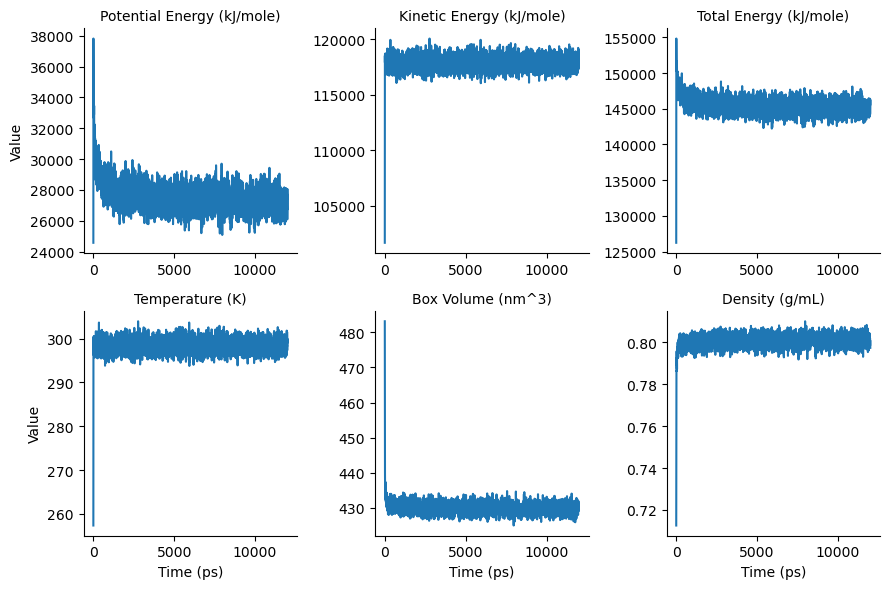

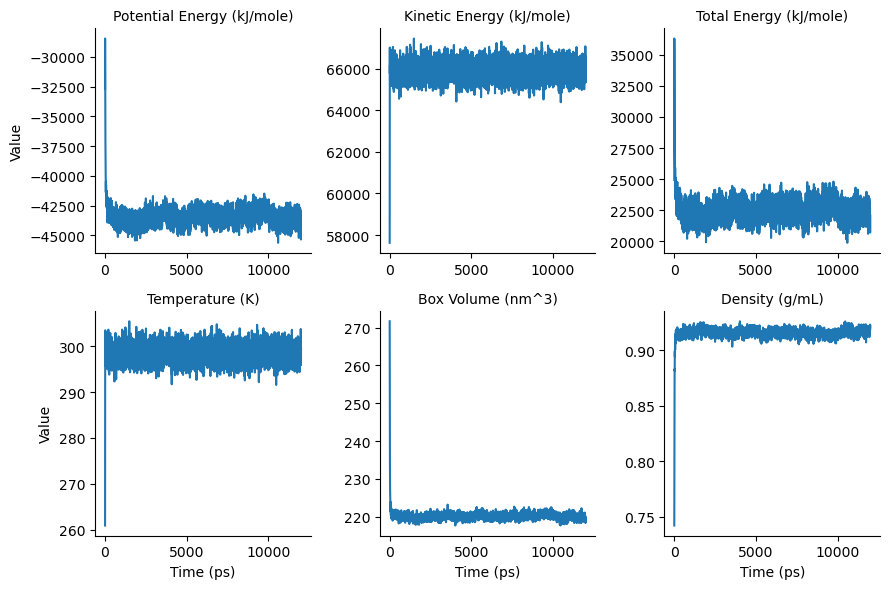

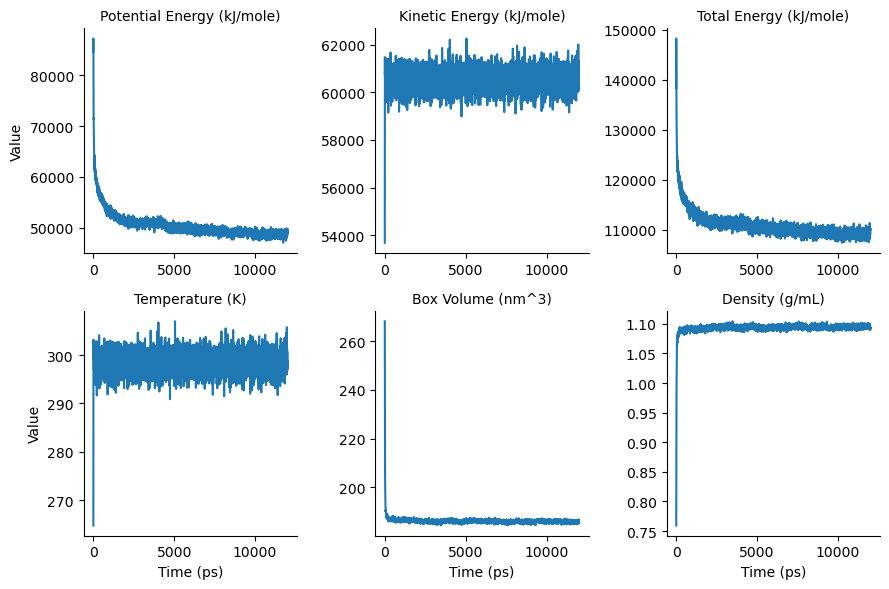

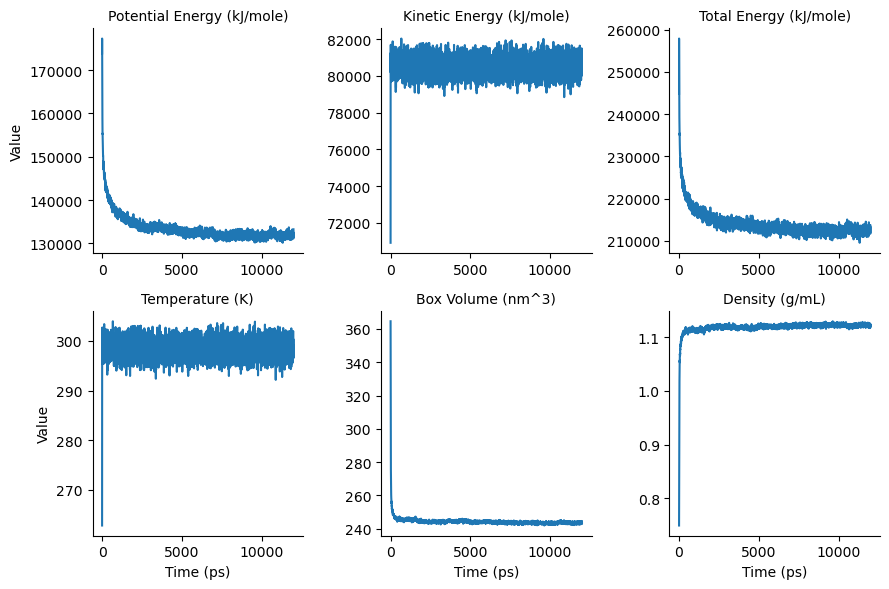

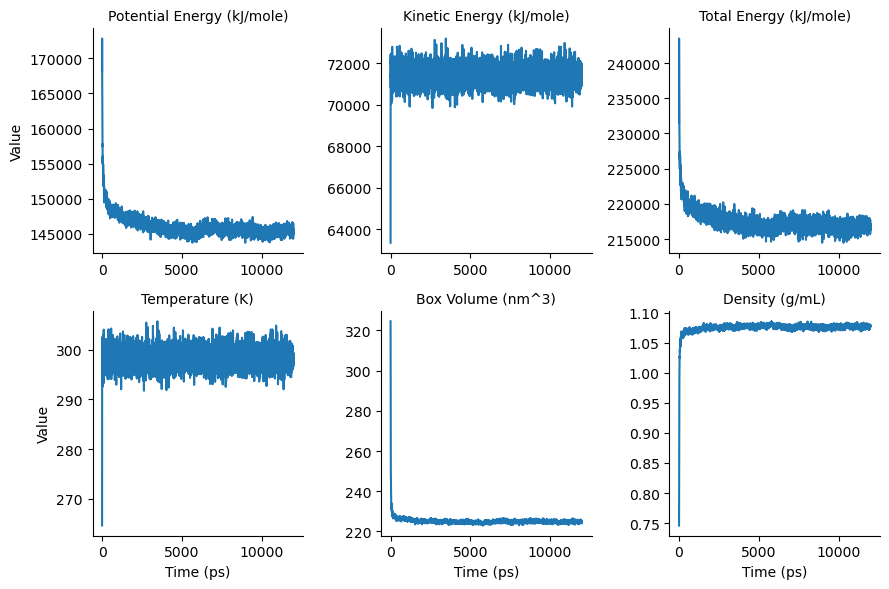

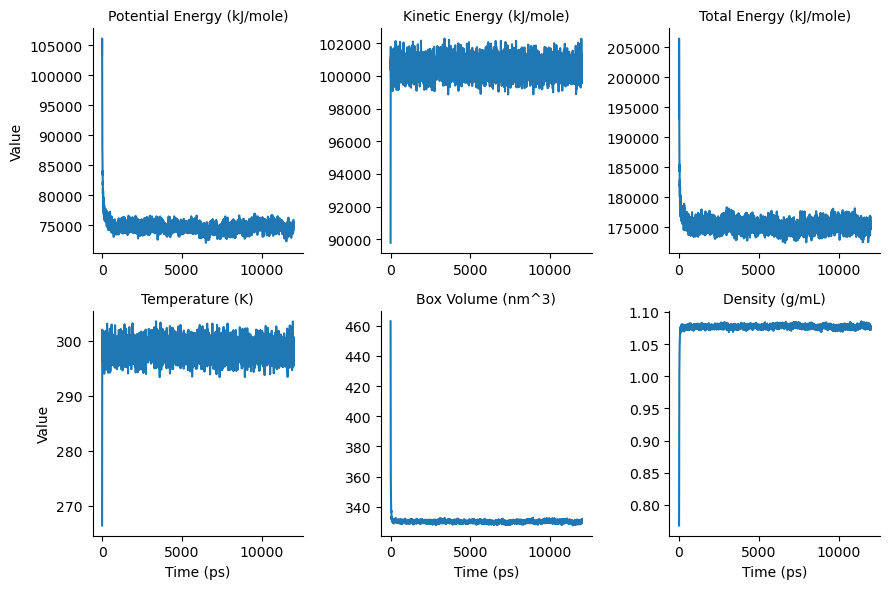

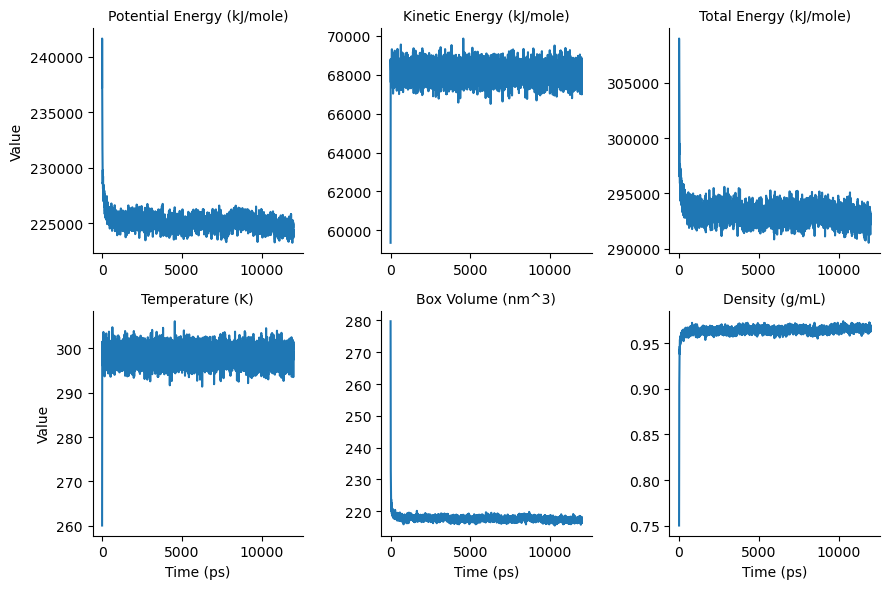

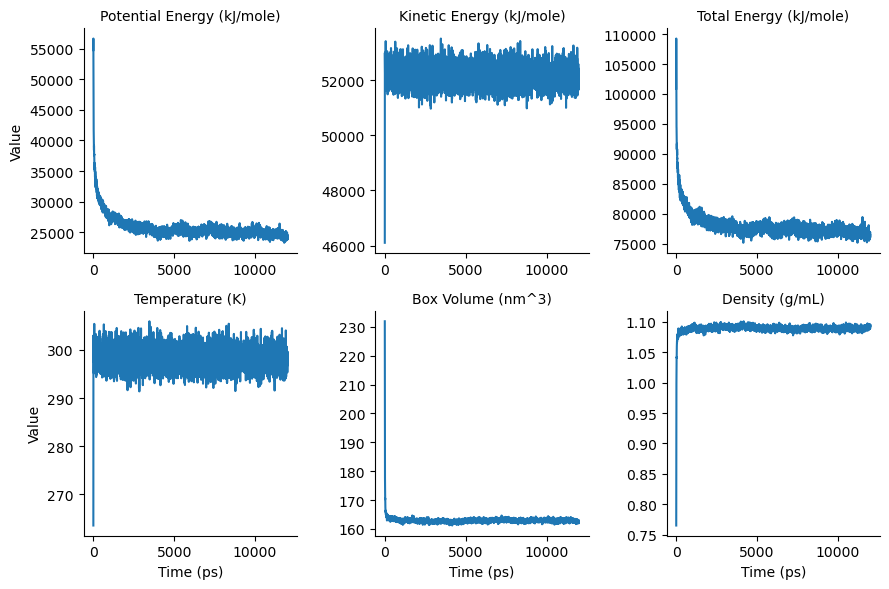

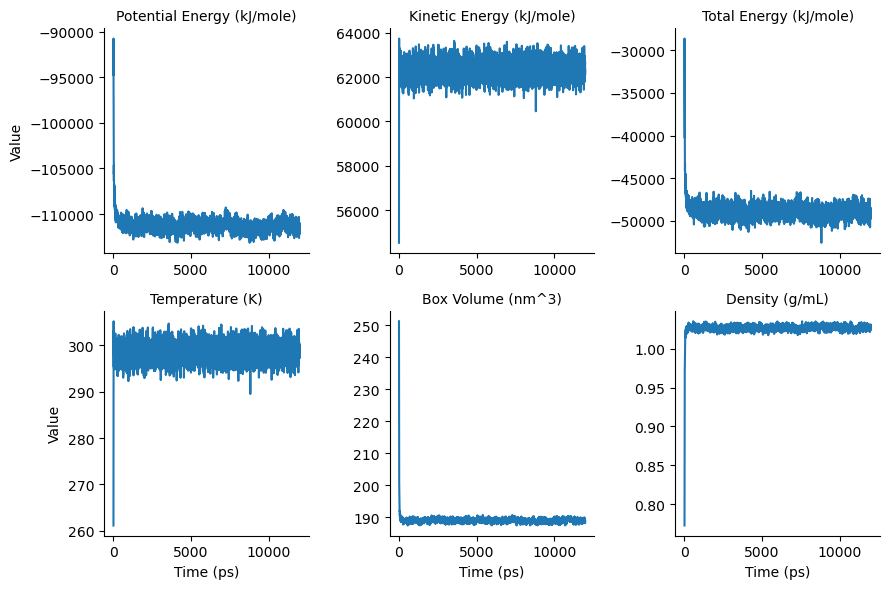

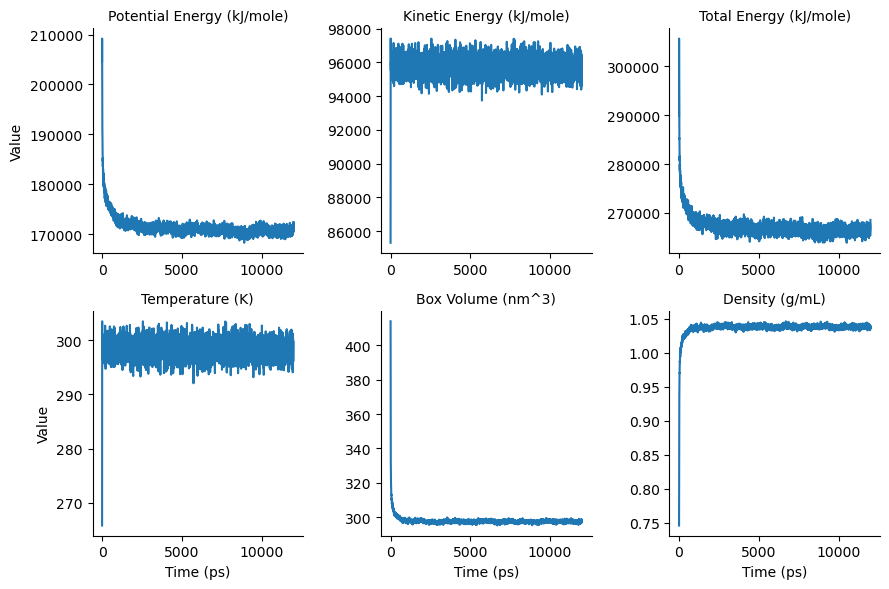

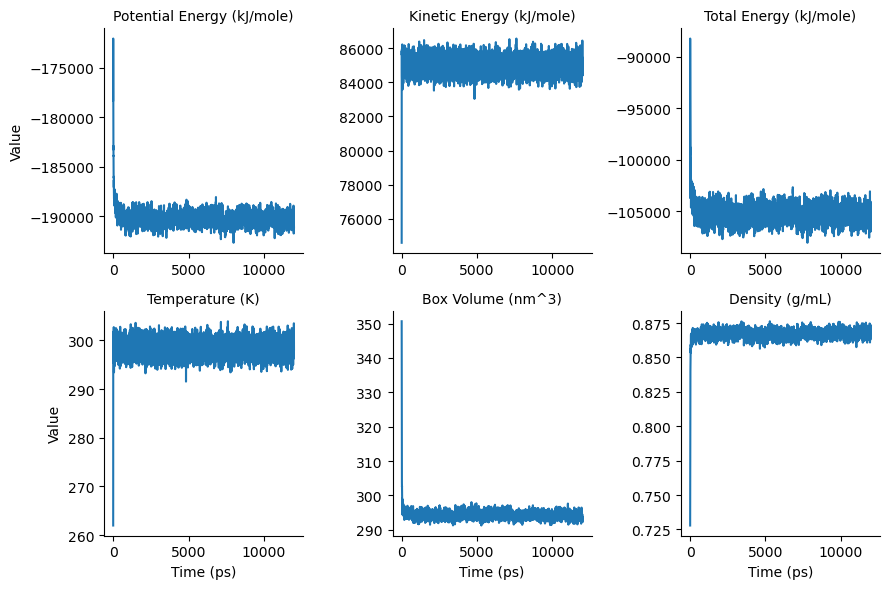

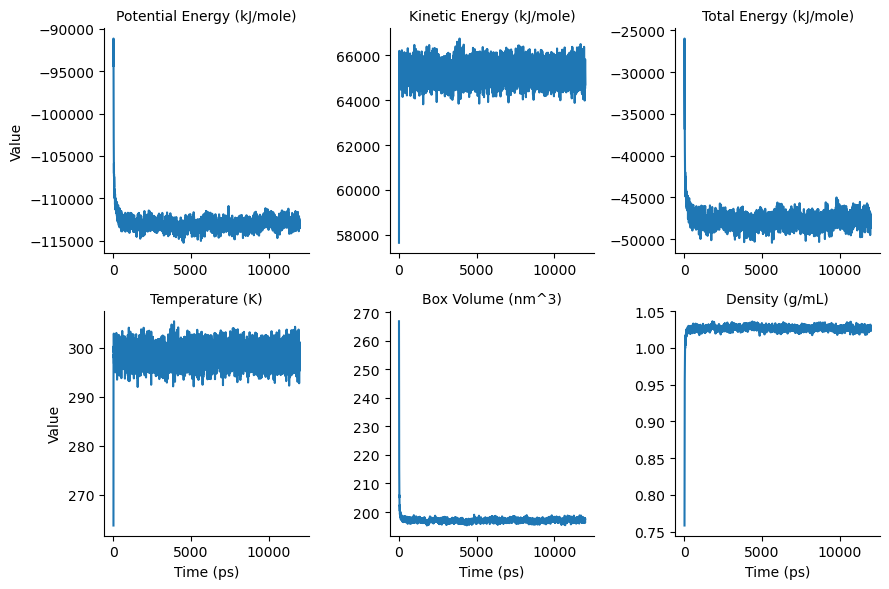

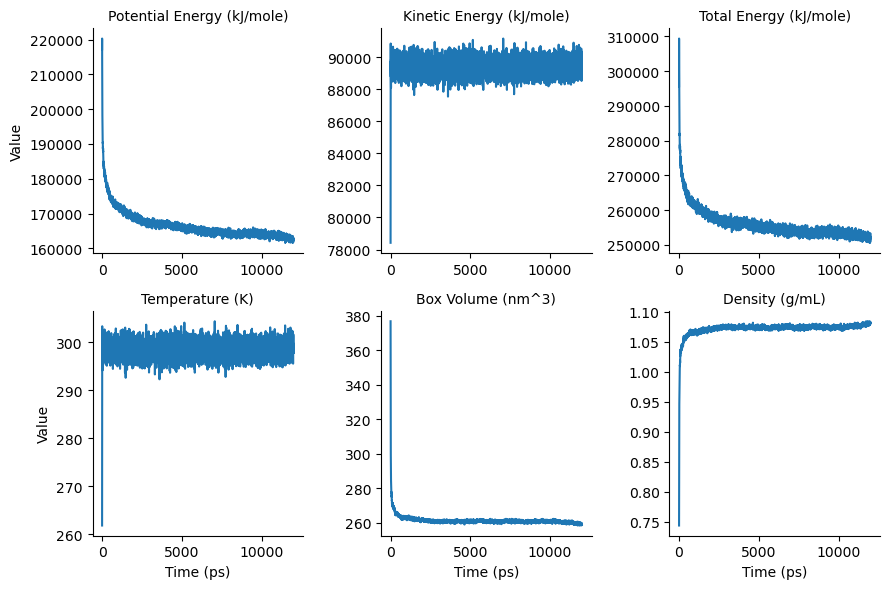

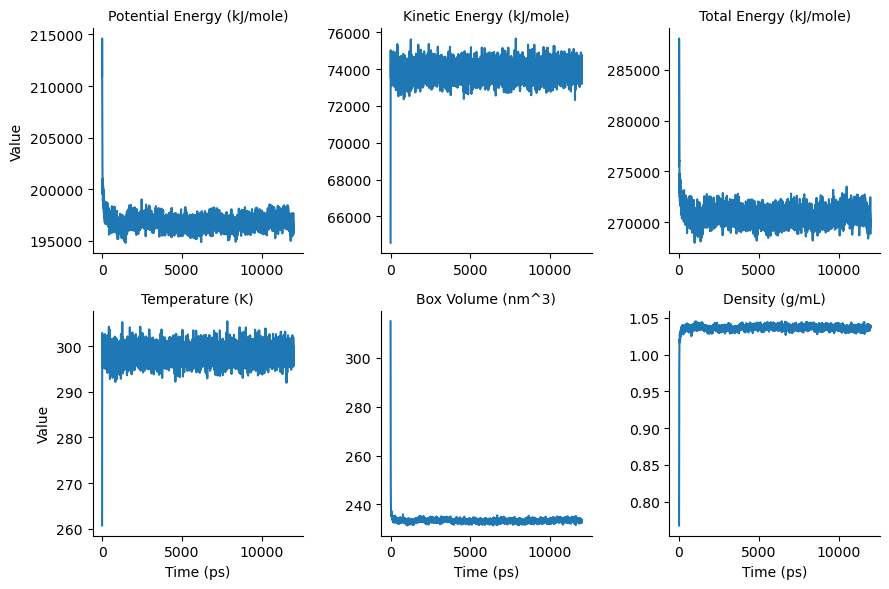

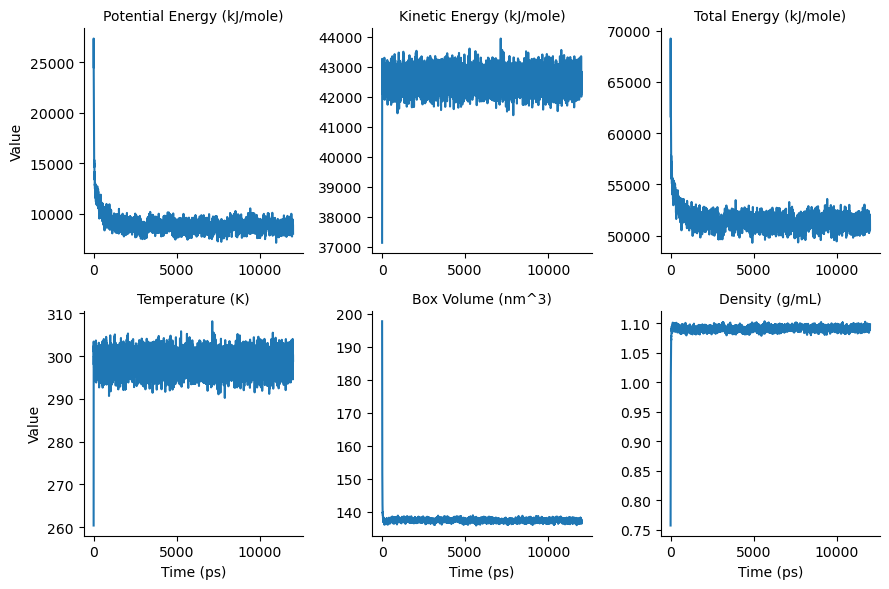

In [16]:
for csv in tqdm.tqdm(interesting_paths):
    plot_csv(csv)